### The codes below are all about visualization

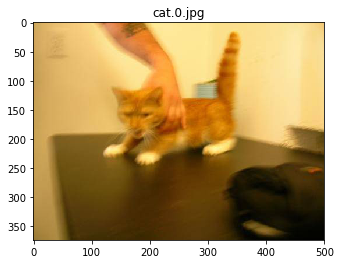

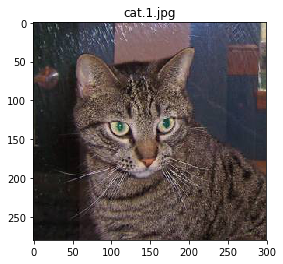

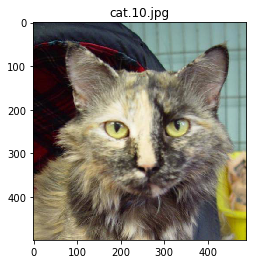

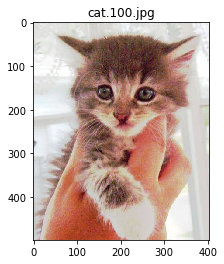

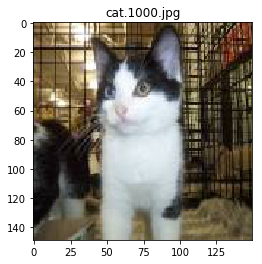

In [5]:
# visualize some pictures in the raw train directory

import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img

namelist = os.listdir('/Users/tifosi/Downloads/train/')
for i in range(1, 6):
    img = load_img("/Users/tifosi/Downloads/train/" + namelist[i])
    plt.title(namelist[i])
    plt.imshow(img)
    plt.show()                

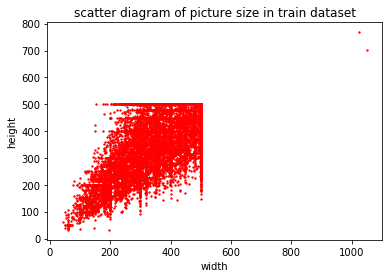

In [4]:
# explore the size of the pictures in train dataset

from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

# get the heights & widths of each picture into heights[], widths[]

targetnames = os.listdir('/Users/tifosi/Downloads/train/')
heights = []
widths = []
for name in targetnames[1:]:
    img = load_img('/Users/tifosi/Downloads/train/'+name)
    x = img_to_array(img)
    heights.append(x.shape[0])
    widths.append(x.shape[1])

# plot scatter diagram

x = np.array(widths)
y = np.array(heights)
area = np.pi * (15 * 0.05)**2  # dot's size

plt.scatter(x, y, s=area, c='r', alpha=1, marker = 'o')
plt.title('scatter diagram of picture size in train dataset')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [1]:
# explore the size of the pictures in train dataset

from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

# get the heights & widths of each picture into heights[], widths[]

targetnames = os.listdir('/Users/tifosi/Downloads/train/')
bad_picture = []
for name in targetnames[1:]:
    img = load_img('/Users/tifosi/Downloads/train/'+name)
    x = img_to_array(img)
    if x.shape[0] < 50 or x.shape[1] < 50:
        bad_picture.append(name) 
print bad_picture

Using TensorFlow backend.


['cat.10392.jpg', 'cat.2433.jpg', 'cat.4821.jpg', 'cat.5527.jpg', 'cat.5534.jpg', 'cat.6402.jpg', 'cat.6614.jpg', 'cat.9171.jpg', 'dog.10733.jpg', 'dog.10747.jpg', 'dog.11248.jpg', 'dog.11686.jpg', 'dog.1324.jpg', 'dog.2652.jpg', 'dog.4367.jpg', 'dog.7011.jpg', 'dog.9246.jpg', 'dog.9705.jpg']


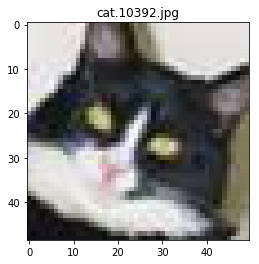

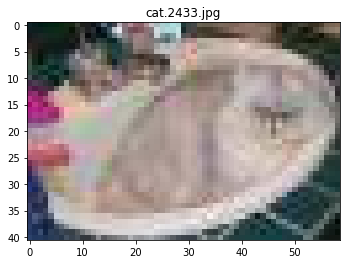

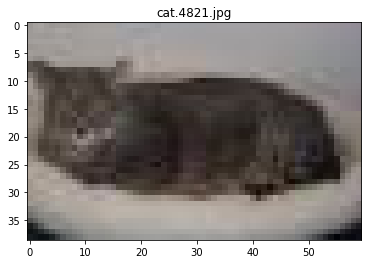

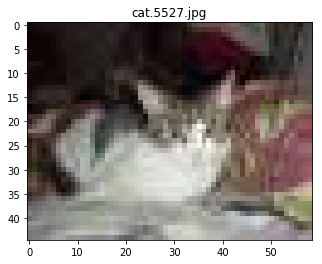

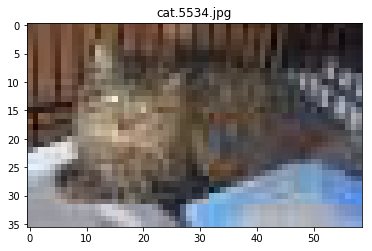

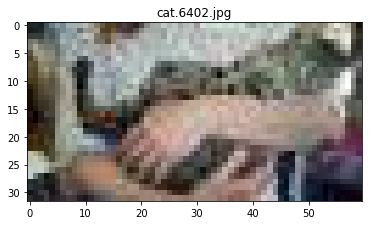

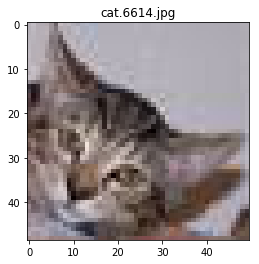

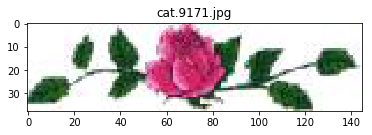

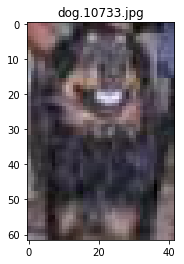

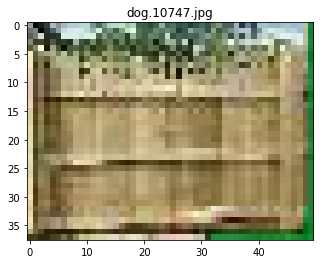

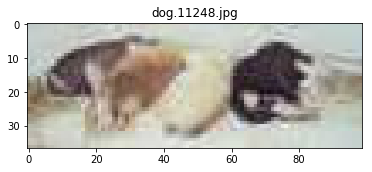

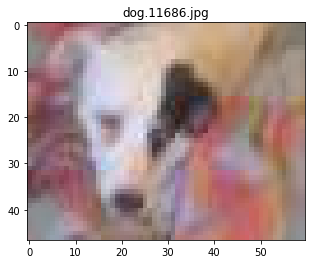

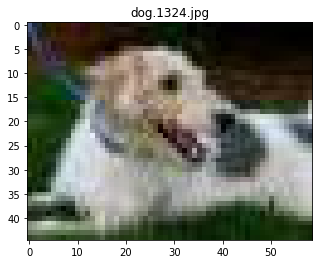

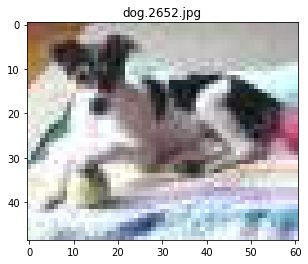

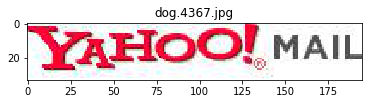

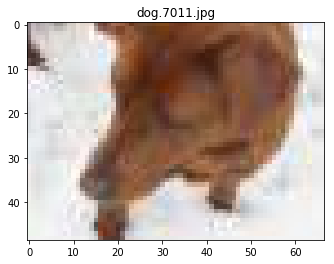

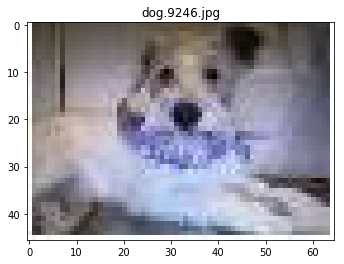

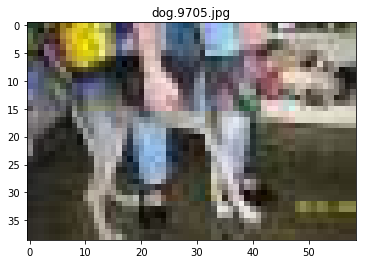

In [4]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
for name in bad_picture[:]:
    img = load_img('/Users/tifosi/Downloads/train/'+name)
    x = img_to_array(img)
    plt.title(name)
    plt.imshow(img)
    plt.show()
    

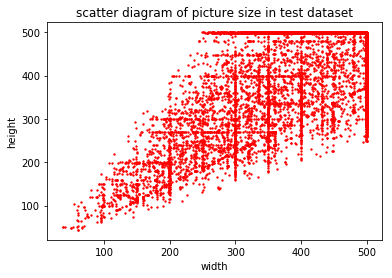

In [5]:
# explore the size of the pictures in test dataset

from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

#get the heights & widths of each picture into heights[], widths[]

targetnames = os.listdir('/Users/tifosi/Downloads/test/')
heights = []
widths = []
for name in targetnames[1:]:
    img = load_img('/Users/tifosi/Downloads/test/'+name)
    x = img_to_array(img)
    heights.append(x.shape[0])
    widths.append(x.shape[1])

# plot scatter diagram

x = np.array(widths)
y = np.array(heights)
area = np.pi * (15 * 0.05)**2  # dot's size

plt.scatter(x, y, s=area, c='r', alpha=1, marker = 'o')
plt.title('scatter diagram of picture size in test dataset')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

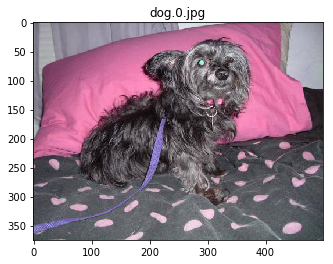

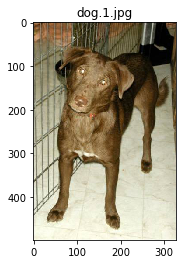

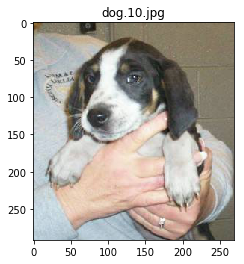

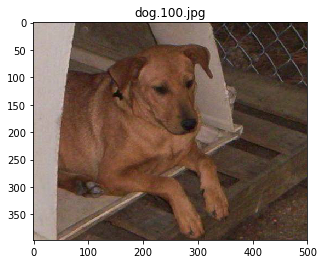

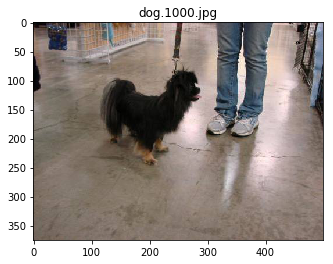

In [4]:
# visualize some pictures in train/dogs

import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img

namelist = os.listdir('/Users/tifosi/Downloads/train_new/dogs')
for i in range(1, 6):
    img = load_img("/Users/tifosi/Downloads/train_new/dogs/" + namelist[i])
    plt.title(namelist[i])
    plt.imshow(img)
    plt.show()

In [28]:
# generate some pictures by augmentation （cat.0.jpg）

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        rotation_range = 30)

img = load_img('/Users/tifosi/Downloads/train/cat.0.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape) 

i = 0
for batch in datagen.flow(
    x, batch_size=1, save_to_dir='/Users/tifosi/Downloads/preview', save_prefix='cat', save_format='jpeg'):
    
    i += 1
    if i > 5:
        break  # generate 6 pictures

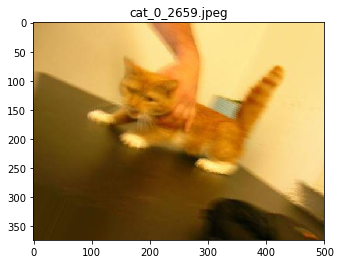

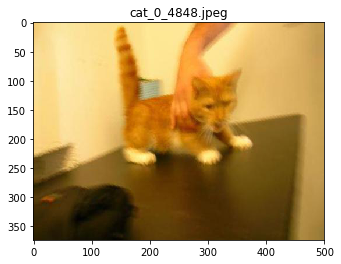

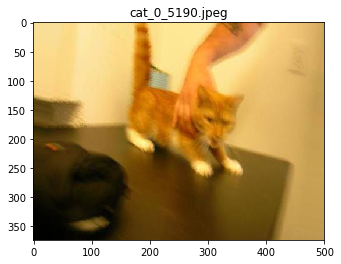

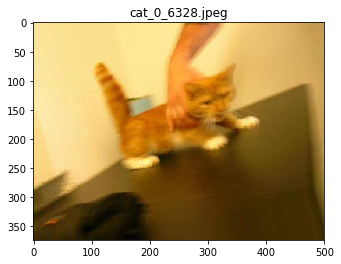

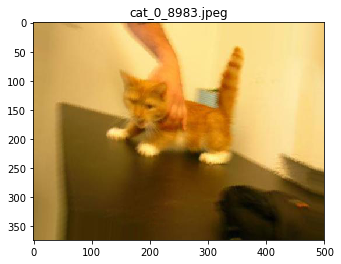

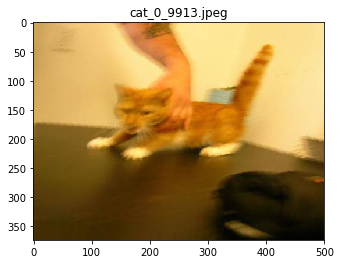

In [29]:
# visualize the augmentated pictures

import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

namelist = os.listdir('/Users/tifosi/Downloads/preview/')

for i in range(1, len(namelist)):
    img = load_img('/Users/tifosi/Downloads/preview/' + namelist[i])
    plt.title(namelist[i])
    plt.imshow(img)
    plt.show()

In [27]:
# visualization of the VGG16-ResNet50 model

from graphviz import Digraph
dot = Digraph()
dot.attr('node', shape='box')
dot.node('i', 'Image')
dot.node('a', 'VGG16 {input: output:} | {(224, 224, 3) (512)}')
dot.node('b', 'ResNet50 {input: output:} | {(224, 224, 3) (2048)}')
dot.node('M', 'Merge {input: output:} | {(512, 2048) (2560)}')
dot.node('D', 'Dense {input: output:} | {(2560) (512)}')
dot.node('d', 'Dropout Rate: 0.5')
dot.node('O', 'Output {input: output:} | {(512) (1)}')

dot.edges(['ia', 'ib'])
dot.edges(['aM', 'bM'])
dot.edges(['MD'])
dot.edges(['Dd'])
dot.edges(['dO'])

dot.render('source/test_model.gv', view=True) 

'model.gv.pdf'